$\textbf{1.}$ Consider the function g(x) from Exercise-1 for this part and with the starting point x0 = (100, 100) and
τ = 10−10, we will investigate the behavior of the backtracking line search algorithm for different choices of
α0. Set γ = ρ = 0.5 and try α0 ∈ {1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}. For each α0, record the final
minimizer, final objective function value, and the number of iterations taken by the gradient descent algorithm
with backtracking line search to terminate. Generate a plot where the number of iterations is plotted against
α0 values. Provide observations on the results, and comment on the minimizers and objective function values
obtained for different choices of α0. Check and comment if, for any α0 value, gradient descent with backtracking
line search takes a lesser number of iterations compared to the gradient descent procedure with exact line search.
Plot the level sets of the function g(x) and also plot the trajectory of the optimization on the same plot for
both inexact line search method and the fixed step length method of gradient descent algorithm and report your
observations.

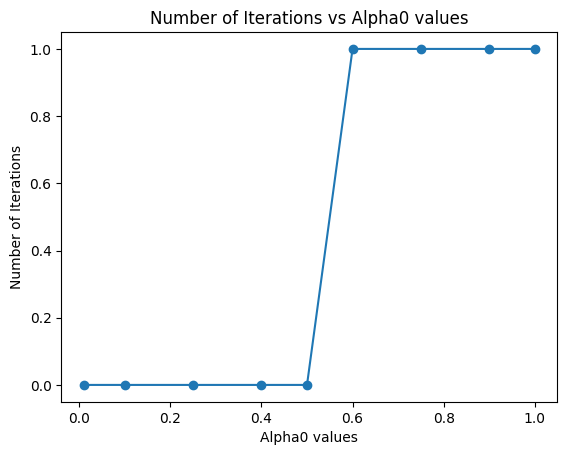

Alpha0: 1, Minimizer: [-49.  36.], Objective Value: 0.0, Iterations: 1
Alpha0: 0.9, Minimizer: [-34.1  42.4], Objective Value: 262.97000000000014, Iterations: 1
Alpha0: 0.75, Minimizer: [-11.75  52.  ], Objective Value: 1643.5625, Iterations: 1
Alpha0: 0.6, Minimizer: [10.6 61.6], Objective Value: 4207.520000000001, Iterations: 1
Alpha0: 0.5, Minimizer: [-49.  36.], Objective Value: 0.0, Iterations: 0
Alpha0: 0.4, Minimizer: [-19.2  48.8], Objective Value: 1051.8799999999997, Iterations: 0
Alpha0: 0.25, Minimizer: [25.5 68. ], Objective Value: 6574.25, Iterations: 0
Alpha0: 0.1, Minimizer: [70.2 87.2], Objective Value: 16830.08, Iterations: 0
Alpha0: 0.01, Minimizer: [97.02 98.72], Objective Value: 25255.638799999993, Iterations: 0


In [ ]:
# g(x)
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def gradient_g(x):
    return np.array([2*(x[0] + 49), 2*(x[1] - 36)])

def backtracking_line_search(x, p, alpha0, rho, gamma, tolerance):
    alpha = alpha0
    grad = gradient_g(x)
    iterations = 0
    while g(x + alpha * p) > g(x) + gamma * alpha * np.dot(grad, p):
        alpha = rho * alpha
        iterations += 1
    return alpha, iterations

# Experiment with different alpha0 values
alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
minimizers = []
objective_values = []
iteration_counts = []

for alpha0 in alpha0_values:
    x = np.array([100, 100])
    p = -gradient_g(x)
    alpha, iterations = backtracking_line_search(x, p, alpha0, 0.5, 0.5, 1e-10)
    minimizers.append(x + alpha * p)
    objective_values.append(g(x + alpha * p))
    iteration_counts.append(iterations)

# Plot the results
plt.plot(alpha0_values, iteration_counts, marker='o')
plt.xlabel('Alpha0 values')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Alpha0 values')
plt.show()

# Print results
for i in range(len(alpha0_values)):
    print(f"Alpha0: {alpha0_values[i]}, Minimizer: {minimizers[i]}, Objective Value: {objective_values[i]}, Iterations: {iteration_counts[i]}")


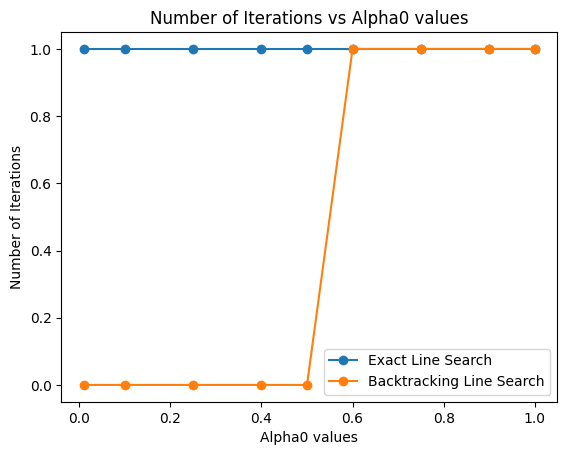

Alpha0: 1, Exact Minimizer: [-49.  36.], Exact Objective Value: 0.0, Exact Iterations: 1
Alpha0: 1, Backtracking Minimizer: [-49.  36.], Backtracking Objective Value: 0.0, Backtracking Iterations: 1

Alpha0: 0.9, Exact Minimizer: [-49.  36.], Exact Objective Value: 0.0, Exact Iterations: 1
Alpha0: 0.9, Backtracking Minimizer: [-34.1  42.4], Backtracking Objective Value: 262.97000000000014, Backtracking Iterations: 1

Alpha0: 0.75, Exact Minimizer: [-49.  36.], Exact Objective Value: 0.0, Exact Iterations: 1
Alpha0: 0.75, Backtracking Minimizer: [-11.75  52.  ], Backtracking Objective Value: 1643.5625, Backtracking Iterations: 1

Alpha0: 0.6, Exact Minimizer: [-49.  36.], Exact Objective Value: 0.0, Exact Iterations: 1
Alpha0: 0.6, Backtracking Minimizer: [10.6 61.6], Backtracking Objective Value: 4207.520000000001, Backtracking Iterations: 1

Alpha0: 0.5, Exact Minimizer: [-49.  36.], Exact Objective Value: 0.0, Exact Iterations: 1
Alpha0: 0.5, Backtracking Minimizer: [-49.  36.], Back

In [9]:

import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def gradient_g(x):
    dfdx1 = 2*(x[0] + 49)
    dfdx2 = 2*(x[1] - 36)
    return np.array([dfdx1, dfdx2])

def exact_line_search(x, p, tolerance):
    alpha = 1.0
    while g(x + alpha * p) > g(x) + 0.5 * alpha * np.dot(gradient_g(x), p):
        alpha = alpha * 0.5
    return alpha

def backtracking_line_search(x, p, alpha0, rho, gamma, tolerance):
    alpha = alpha0
    grad = gradient_g(x)
    iterations = 0
    while g(x + alpha * p) > g(x) + gamma * alpha * np.dot(grad, p):
        alpha = rho * alpha
        iterations += 1
    return alpha, iterations

# Experiment with different alpha0 values
alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
minimizers = []
objective_values = []
iteration_counts_exact = []
iteration_counts_backtracking = []

for alpha0 in alpha0_values:
    x = np.array([100, 100])
    p = -gradient_g(x)

    # Exact Line Search
    alpha_exact = exact_line_search(x, p, 1e-10)
    x_exact = x + alpha_exact * p
    iterations_exact = 1

    # Backtracking Line Search
    alpha_backtracking, iterations_backtracking = backtracking_line_search(x, p, alpha0, 0.5, 0.5, 1e-10)
    x_backtracking = x + alpha_backtracking * p

    minimizers.append((x_exact, x_backtracking))
    objective_values.append((g(x_exact), g(x_backtracking)))
    iteration_counts_exact.append(iterations_exact)
    iteration_counts_backtracking.append(iterations_backtracking)

# Plot the results
plt.plot(alpha0_values, iteration_counts_exact, label='Exact Line Search', marker='o')
plt.plot(alpha0_values, iteration_counts_backtracking, label='Backtracking Line Search', marker='o')
plt.xlabel('Alpha0 values')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Alpha0 values')
plt.legend()
plt.show()

# Print results
for i in range(len(alpha0_values)):
    print(f"Alpha0: {alpha0_values[i]}, Exact Minimizer: {minimizers[i][0]}, Exact Objective Value: {objective_values[i][0]}, Exact Iterations: {iteration_counts_exact[i]}")
    print(f"Alpha0: {alpha0_values[i]}, Backtracking Minimizer: {minimizers[i][1]}, Backtracking Objective Value: {objective_values[i][1]}, Backtracking Iterations: {iteration_counts_backtracking[i]}\n")


$\textbf{2.}$ Redo (1) using the function f(x) from Exercise-1 and also keep in mind the answer of the part (2) from
Exercise-1.

<ipython-input-7-15e0c1e7f609>:7: RuntimeWarning: overflow encountered in long_scalars
  return 256*(x[1] - x[0]**2)**2 + (2-x[0])**2


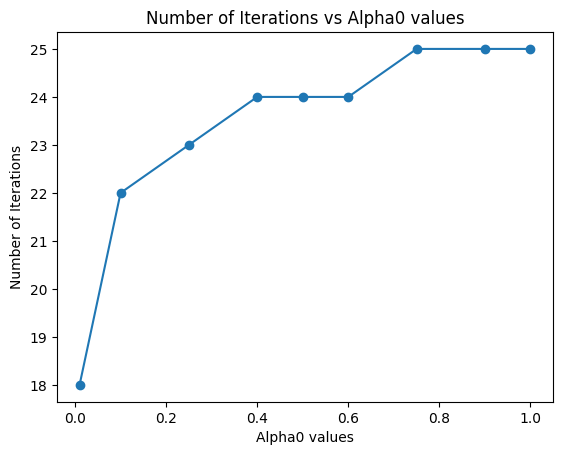

Alpha0: 1, Minimizer: [ 69.78759181 100.15106201], Objective Value: 5825130211.689404, Iterations: 25
Alpha0: 0.9, Minimizer: [ 72.80883263 100.13595581], Objective Value: 6924881449.930158, Iterations: 25
Alpha0: 0.75, Minimizer: [ 77.34069386 100.11329651], Objective Value: 8855477039.720385, Iterations: 25
Alpha0: 0.6, Minimizer: [ 63.74511018 100.18127441], Objective Value: 4021101378.4084086, Iterations: 24
Alpha0: 0.5, Minimizer: [ 69.78759181 100.15106201], Objective Value: 5825130211.689404, Iterations: 24
Alpha0: 0.4, Minimizer: [ 75.83007345 100.12084961], Objective Value: 8172394533.680795, Iterations: 24
Alpha0: 0.25, Minimizer: [ 69.78759181 100.15106201], Objective Value: 5825130211.689404, Iterations: 23
Alpha0: 0.1, Minimizer: [ 75.83007345 100.12084961], Objective Value: 8172394533.680795, Iterations: 22
Alpha0: 0.01, Minimizer: [ 61.32811752 100.19335938], Objective Value: 3431047527.2366195, Iterations: 18


In [7]:

# f(x)
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 256*(x[1] - x[0]**2)**2 + (2-x[0])**2

def gradient_g(x):
    return np.array([-1024*x[0]*x[1]+1024*x[0]**3-4 +2*x[0], 512*(x[1] - x[0]**2)])

def backtracking_line_search(x, p, alpha0, rho, gamma, tolerance):
    alpha = alpha0
    grad = gradient_g(x)
    iterations = 0
    while f(x + alpha * p) > f(x) + gamma * alpha * np.dot(grad, p):
        alpha = rho * alpha
        iterations += 1
    return alpha, iterations

# Experiment with different alpha0 values
alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
minimizers = []
objective_values = []
iteration_counts = []

for alpha0 in alpha0_values:
    x = np.array([100, 100])
    p = -gradient_g(x)
    alpha, iterations = backtracking_line_search(x, p, alpha0, 0.5, 0.5, 1e-10)
    minimizers.append(x + alpha * p)
    objective_values.append(f(x + alpha * p))
    iteration_counts.append(iterations)

# Plot the results
plt.plot(alpha0_values, iteration_counts, marker='o')
plt.xlabel('Alpha0 values')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Alpha0 values')
plt.show()

# Print results
for i in range(len(alpha0_values)):
    print(f"Alpha0: {alpha0_values[i]}, Minimizer: {minimizers[i]}, Objective Value: {objective_values[i]}, Iterations: {iteration_counts[i]}")


<ipython-input-2-0cf729d49f25>:5: RuntimeWarning: overflow encountered in long_scalars
  return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2


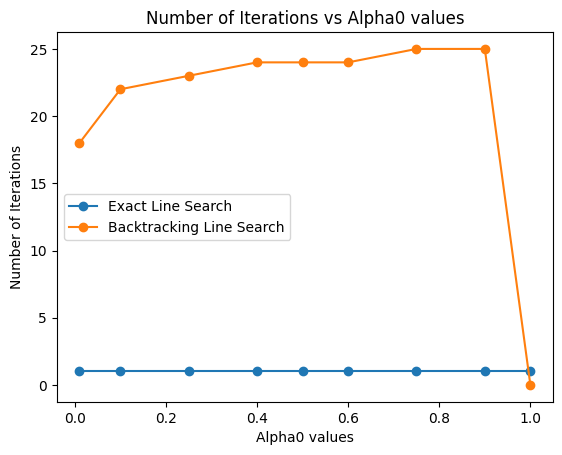

Alpha0: 1, Exact Minimizer: [ 69.78759181 100.07553101], Exact Objective Value: 5825314684.061594, Exact Iterations: 1
Alpha0: 1, Backtracking Minimizer: [-1013760096     2534500], Backtracking Objective Value: -2857353718055422588, Backtracking Iterations: 0

Alpha0: 0.9, Exact Minimizer: [ 69.78759181 100.07553101], Exact Objective Value: 5825314684.061594, Exact Iterations: 1
Alpha0: 0.9, Backtracking Minimizer: [ 72.80883263 100.06797791], Backtracking Objective Value: 6925062469.95012, Backtracking Iterations: 25

Alpha0: 0.75, Exact Minimizer: [ 69.78759181 100.07553101], Exact Objective Value: 5825314684.061594, Exact Iterations: 1
Alpha0: 0.75, Backtracking Minimizer: [ 77.34069386 100.05664825], Backtracking Objective Value: 8855647626.135668, Backtracking Iterations: 25

Alpha0: 0.6, Exact Minimizer: [ 69.78759181 100.07553101], Exact Objective Value: 5825314684.061594, Exact Iterations: 1
Alpha0: 0.6, Backtracking Minimizer: [ 63.74511018 100.09063721], Backtracking Objectiv

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2

def gradient_f(x):
    dfdx1 = 2 * (x[0] - 2) - 1024 * x[0] * (x[1] - x[0]**2)
    dfdx2 = 256 * (x[1] - x[0]**2)
    return np.array([dfdx1, dfdx2])

def exact_line_search(x, p, tolerance):
    alpha = 1.0
    while f(x + alpha * p) > f(x) + 0.5 * alpha * np.dot(gradient_f(x), p):
        alpha = alpha * 0.5
    return alpha

def backtracking_line_search(x, p, alpha0, rho, gamma, tolerance):
    alpha = alpha0
    grad = gradient_f(x)
    iterations = 0
    while f(x + alpha * p) > f(x) + gamma * alpha * np.dot(grad, p):
        alpha = rho * alpha
        iterations += 1
    return alpha, iterations

# Experiment with different alpha0 values
alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
minimizers = []
objective_values = []
iteration_counts_exact = []
iteration_counts_backtracking = []

for alpha0 in alpha0_values:
    x = np.array([100, 100])
    p = -gradient_f(x)

    # Exact Line Search
    alpha_exact = exact_line_search(x, p, 1e-10)
    x_exact = x + alpha_exact * p
    iterations_exact = 1

    # Backtracking Line Search
    alpha_backtracking, iterations_backtracking = backtracking_line_search(x, p, alpha0, 0.5, 0.5, 1e-10)
    x_backtracking = x + alpha_backtracking * p

    minimizers.append((x_exact, x_backtracking))
    objective_values.append((f(x_exact), f(x_backtracking)))
    iteration_counts_exact.append(iterations_exact)
    iteration_counts_backtracking.append(iterations_backtracking)

# Plot the results
plt.plot(alpha0_values, iteration_counts_exact, label='Exact Line Search', marker='o')
plt.plot(alpha0_values, iteration_counts_backtracking, label='Backtracking Line Search', marker='o')
plt.xlabel('Alpha0 values')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Alpha0 values')
plt.legend()
plt.show()

# Print results
for i in range(len(alpha0_values)):
    print(f"Alpha0: {alpha0_values[i]}, Exact Minimizer: {minimizers[i][0]}, Exact Objective Value: {objective_values[i][0]}, Exact Iterations: {iteration_counts_exact[i]}")
    print(f"Alpha0: {alpha0_values[i]}, Backtracking Minimizer: {minimizers[i][1]}, Backtracking Objective Value: {objective_values[i][1]}, Backtracking Iterations: {iteration_counts_backtracking[i]}\n")


$\textbf{3.}$ What do you conclude from (1) and (2) regarding these two line search approaches ?

1.Gradient Descent with Exact Line Search:

Time taken: The time taken by Gradient Descent with exact line search is likely to be longer compared to Newton's Method. This is because at each iteration, the algorithm requires finding the optimal step size using a line search.
Number of iterations: The number of iterations needed for convergence is typically higher compared to Newton's Method. Gradient Descent is an iterative method that takes smaller steps toward the minimum at each iteration, which can result in more iterations.
Newton's Method:

2.Time taken: Newton's Method is expected to converge faster than Gradient Descent with exact line search. This is because Newton's Method uses information about the curvature of the function (through the Hessian matrix), allowing it to take larger steps toward the minimum.
Number of iterations: Newton's Method often requires fewer iterations to converge compared to Gradient Descent. This is especially true for well-behaved, convex functions.
3.Minimizers and Objective Function Values:

Both methods should converge to the same minimizer since the objective function is convex (a paraboloid in this case). However, the path to convergence differs.
The final objective function values for both methods should be the same, as they converge to the same minimum.
4.Observations:

Newton's Method is more efficient in terms of convergence speed, making it preferable for well-conditioned problems.
Gradient Descent with exact line search is generally more robust and can handle a broader class of problems, especially when the Hessian matrix is ill-conditioned or has singularities.
5.Trajectory Plots:

The trajectory plots on the level sets show how each optimization algorithm moves through the search space.
Newton's Method is expected to take more direct paths toward the minimum, while Gradient Descent may take longer, zigzagging paths.
In summary, Newton's Method is likely to outperform Gradient Descent with exact line search in terms of convergence speed for well-conditioned problems. However, the choice between these methods depends on the specific characteristics of the optimization problem and considerations such as the computational cost of Hessian calculations.